In [238]:
# !!pip install mlxtend

In [239]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [240]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
%matplotlib inline

In [241]:
df1= pd.read_csv('/Users/da_m1_47/Downloads/avocado.csv')



In [242]:
df1.shape

(18249, 15)

In [605]:
df1.head(10)

,Unnamed: 0.1,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,DayOfWeek,Month,Year,Seasons
0,0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0,26,2,2015,1
1,1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0,19,2,2015,1
2,2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0,12,2,2015,1
3,3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0,5,2,2015,1
4,4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0,28,9,2015,4
5,5,5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,0,2015,0,21,9,2015,4
6,6,6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,0,2015,0,14,9,2015,4
7,7,7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,0,2015,0,7,9,2015,4
8,8,8,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,0,2015,0,0,9,2015,4
9,9,9,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,0,2015,0,24,10,2015,4


In [606]:
df1.tail()

,Unnamed: 0.1,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,DayOfWeek,Month,Year,Seasons
18244,18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53,3,3,2018,1
18245,18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53,27,4,2018,1
18246,18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53,20,4,2018,1
18247,18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53,13,4,2018,1
18248,18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,1,2018,53,6,4,2018,1


In [261]:


# Extracting the day of the week
df1['DayOfWeek'] = pd.to_datetime(df1['Date']).dt.day

# Extracting the month
df1['Month'] = pd.to_datetime(df1['Date']).dt.month_name()

# Extracting the year
df1['Year'] = pd.to_datetime(df1['Date']).dt.year

# Print the updated DataFrame
print(df1)


       Unnamed: 0.1  Unnamed: 0        Date  AveragePrice  Total Volume  \
0                 0           0  2015-12-27          1.33      64236.62   
1                 1           1  2015-12-20          1.35      54876.98   
2                 2           2  2015-12-13          0.93     118220.22   
3                 3           3  2015-12-06          1.08      78992.15   
4                 4           4  2015-11-29          1.28      51039.60   
...             ...         ...         ...           ...           ...   
18244         18244           7  2018-02-04          1.63      17074.83   
18245         18245           8  2018-01-28          1.71      13888.04   
18246         18246           9  2018-01-21          1.87      13766.76   
18247         18247          10  2018-01-14          1.93      16205.22   
18248         18248          11  2018-01-07          1.62      17489.58   

          4046       4225    4770  Total Bags  Small Bags  Large Bags  \
0      1036.74   54454.85 

In [607]:
df1

,Unnamed: 0.1,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,DayOfWeek,Month,Year,Seasons
0,0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0,26,2,2015,1
1,1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0,19,2,2015,1
2,2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0,12,2,2015,1
3,3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0,5,2,2015,1
4,4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0,28,9,2015,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53,3,3,2018,1
18245,18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53,27,4,2018,1
18246,18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53,20,4,2018,1
18247,18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53,13,4,2018,1


In [262]:

def get_season(month):
    if month in ['December', "January", "February"]:
        return 1
    elif month in ["March", "April", "May"]:
        return 2
    elif month in ["June", "July", "August"]:
        return 3
    else:
        return 4


df1['Seasons'] = df1['Month'].apply(get_season)


print(df1)



       Unnamed: 0.1  Unnamed: 0        Date  AveragePrice  Total Volume  \
0                 0           0  2015-12-27          1.33      64236.62   
1                 1           1  2015-12-20          1.35      54876.98   
2                 2           2  2015-12-13          0.93     118220.22   
3                 3           3  2015-12-06          1.08      78992.15   
4                 4           4  2015-11-29          1.28      51039.60   
...             ...         ...         ...           ...           ...   
18244         18244           7  2018-02-04          1.63      17074.83   
18245         18245           8  2018-01-28          1.71      13888.04   
18246         18246           9  2018-01-21          1.87      13766.76   
18247         18247          10  2018-01-14          1.93      16205.22   
18248         18248          11  2018-01-07          1.62      17489.58   

          4046       4225    4770  Total Bags  Small Bags  Large Bags  \
0      1036.74   54454.85 

In [608]:
df1['Seasons'].unique()

array([1, 4, 3, 2])

In [609]:
missing_values = df1.isnull().sum()

# Alternatively, check for missing values in each column separately
missing_values_per_column = df1.isnull().sum(axis=0)

# Print the summary of missing values
print(missing_values)

# Print the summary of missing values per column
print(missing_values_per_column)

Unnamed: 0.1    0
Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
DayOfWeek       0
Month           0
Year            0
Seasons         0
dtype: int64
Unnamed: 0.1    0
Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
DayOfWeek       0
Month           0
Year            0
Seasons         0
dtype: int64


In [610]:

columns_of_interest = [ 'AveragePrice' ,'Total Volume' , '4046'	, '4225' , '4770' , 'Total Bags' , 'Small Bags' , 'Large Bags' , 'XLarge Bags' , 'type' ] 
summary_stats = df1[columns_of_interest].describe()
print(summary_stats)


       AveragePrice  Total Volume          4046          4225          4770  \
count  18249.000000  1.824900e+04  1.824900e+04  1.824900e+04  1.824900e+04   
mean       1.405978  8.506440e+05  2.930084e+05  2.951546e+05  2.283974e+04   
std        0.402677  3.453545e+06  1.264989e+06  1.204120e+06  1.074641e+05   
min        0.440000  8.456000e+01  0.000000e+00  0.000000e+00  0.000000e+00   
25%        1.100000  1.083858e+04  8.540700e+02  3.008780e+03  0.000000e+00   
50%        1.370000  1.073768e+05  8.645300e+03  2.906102e+04  1.849900e+02   
75%        1.660000  4.329623e+05  1.110202e+05  1.502069e+05  6.243420e+03   
max        3.250000  6.250565e+07  2.274362e+07  2.047057e+07  2.546439e+06   

         Total Bags    Small Bags    Large Bags    XLarge Bags          type  
count  1.824900e+04  1.824900e+04  1.824900e+04   18249.000000  18249.000000  
mean   2.396392e+05  1.821947e+05  5.433809e+04    3106.426507      0.499918  
std    9.862424e+05  7.461785e+05  2.439660e+05   1

In [611]:

correlation0 = df1['AveragePrice'].corr(df1['Total Volume'])
correlation1 = df1['AveragePrice'].corr(df1['4046'])
correlation2 = df1['AveragePrice'].corr(df1['4225'])
correlation3 = df1['AveragePrice'].corr(df1['4770'])
correlation3 = df1['AveragePrice'].corr(df1['Total Bags'])
correlation4 = df1['AveragePrice'].corr(df1['Small Bags'])
correlation5 = df1['AveragePrice'].corr(df1['Large Bags'])
correlation6 = df1['AveragePrice'].corr(df1['XLarge Bags'])



# Print the correlation coefficient
print('Correlation coefficient:\n', 
      correlation0,
      correlation1,
      correlation2,
      correlation3,
      correlation4,
      correlation5,
      correlation6)


Correlation coefficient:
 -0.19275238715271917 -0.20831704848788477 -0.1729277725093354 -0.17708792839046766 -0.17472978377396522 -0.17294000978530413 -0.11759162287452997


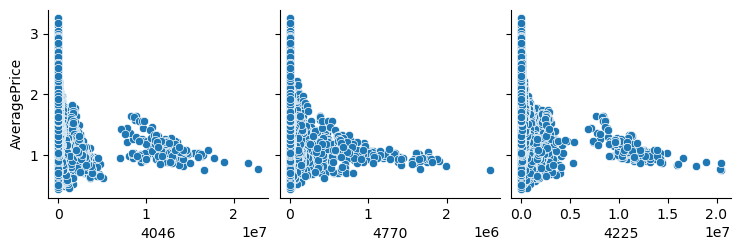

In [666]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called 'df' with columns 'x1', 'x2', 'x3', and 'y'

# Create scatter plots for each pair of variables
sns.pairplot(df1, x_vars=['4046', '4770', '4225'], y_vars=['AveragePrice'], kind='scatter')
plt.show()


MULTICOLLINEARITY

In [662]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


subset_df = df1[['4046', '4225', '4770', 'Total Volume', 'Seasons','region', 'Month', 'Year', 'type']]

# Calculate the VIF for each variable
vif = pd.DataFrame()
vif["Variable"] = subset_df.columns
vif["VIF"] = [variance_inflation_factor(subset_df.values, i) for i in range(subset_df.shape[1])]

# Print the VIF values
print(vif)


       Variable        VIF
0          4046  35.242208
1          4225  33.276916
2          4770   4.999085
3  Total Volume  98.864067
4       Seasons   9.497263
5        region   4.109070
6         Month   6.163516
7          Year   9.766282
8          type   2.119010


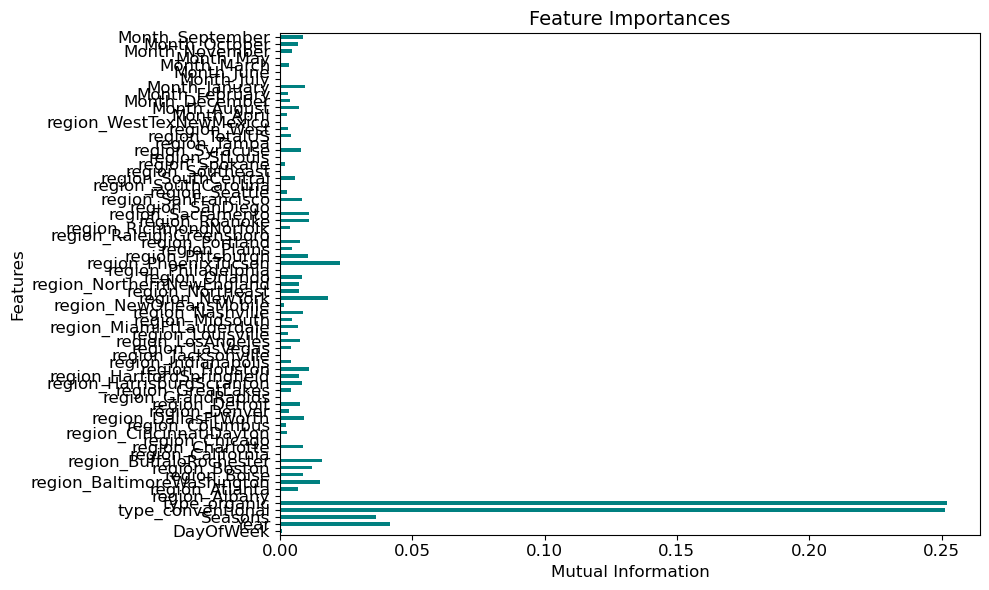

In [256]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_regression

# Assuming 'df1' is your DataFrame
Y = df1['AveragePrice']

# Convert categorical variables to one-hot encoded representation
X = pd.get_dummies(df1[['type', 'region', 'DayOfWeek', 'Month', 'Year', 'Seasons']])

importances = mutual_info_regression(X, Y)
feat_importances = pd.Series(importances, index=X.columns)

# Increase the figure size
plt.figure(figsize=(10, 6))

# Plot the feature importances with larger font size
feat_importances.plot(kind='barh', color='teal', fontsize=12)

# Set labels and title
plt.xlabel('Mutual Information', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Feature Importances', fontsize=14)

# Increase the spacing between the bars
plt.subplots_adjust(left=0.3)

# Display the plot
plt.tight_layout()
plt.show()


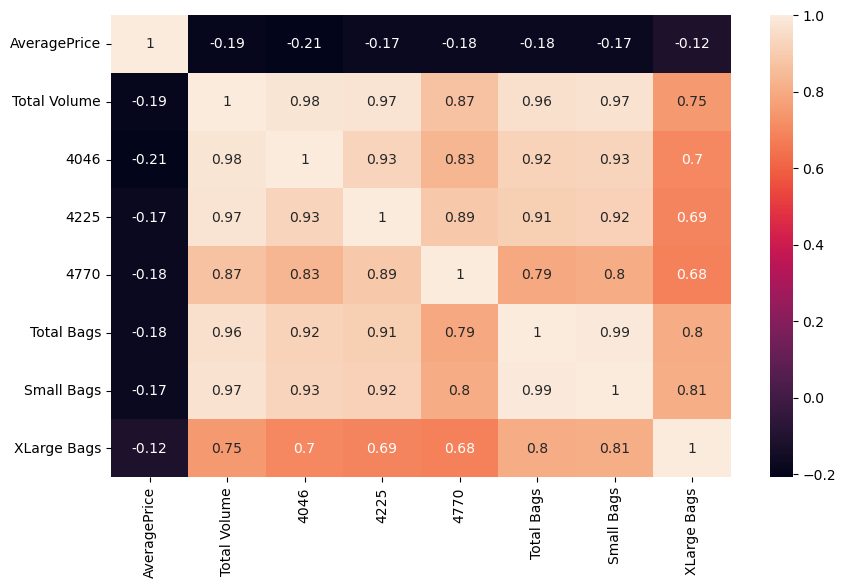

In [638]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called 'df1' with columns 'column1', 'column2', 'column3', 'column4'

# Select the desired columns for correlation
selected_columns = ['AveragePrice', 'Total Volume', '4046', '4225','4770', 'Total Bags', 'Small Bags', 'XLarge Bags']

# Subset the DataFrame to include only the selected columns
subset_df = df1[selected_columns]

# Calculate the correlation matrix
cor = subset_df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cor, annot=True)
plt.show()


In [613]:

#VARIANCE THRESHOLD
import pandas as pd
from sklearn.feature_selection import VarianceThreshold

selected_columns = ['AveragePrice','Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags', 'XLarge Bags','Year']  

X = df1[selected_columns]  # Select the specific columns
v_threshold = VarianceThreshold(threshold=0)
v_threshold.fit(X)
selected_features = v_threshold.get_support()

print(selected_features)


[ True  True  True  True  True  True  True  True  True  True]


<BarContainer object of 10 artists>

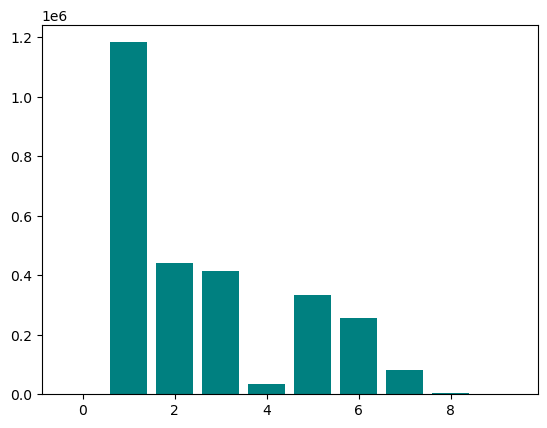

In [614]:

mean_abs_diff = np.sum(np.abs(X -np.mean(X,axis = 0)), axis =0)/X.shape[0]

plt.bar(np.arange(X.shape[1]),mean_abs_diff, color = 'teal')

In [615]:
df1.nunique()

Unnamed: 0.1    18249
Unnamed: 0         53
Date              169
AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
DayOfWeek          31
Month              12
Year                4
Seasons             4
dtype: int64

In [ ]:
df = df1.drop('year', axis=1)

In [594]:
df = df1.drop('Unnamed: 0.1', axis=1)

In [616]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df1['type']= label_encoder.fit_transform(df1['type'])
  
df1['type'].unique()

array([0, 1])

In [617]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df1['DayOfWeek']= label_encoder.fit_transform(df1['DayOfWeek'])
df1['region']= label_encoder.fit_transform(df1['region'])
df1['Month']= label_encoder.fit_transform(df1['Month'])

df['DayOfWeek'].unique()

array([26, 19, 12,  5, 28, 21, 14,  7,  0, 24, 17, 10,  3, 29, 22, 15,  8,
        1, 25, 18, 11,  4, 27, 20, 13,  6, 30, 23, 16,  9,  2])

<h1>MACHINE LEARNING MODEL<h1>

In [639]:
features = [ '4046','4770','4225', 'Total Bags','Seasons','region', 'Month', 'Year', 'type']
target = 'AveragePrice'
X = df1[features]
Y = df1[target]


import pandas
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()



scaledX = scale.fit_transform(X)

print(scaledX)


[[-0.23081597 -0.21209136 -0.1999022  ... -1.03050323 -1.22128204
  -0.99983562]
 [-0.23110251 -0.21199672 -0.20805446 ... -1.03050323 -1.22128204
  -0.99983562]
 [-0.23100731 -0.21132513 -0.1544779  ... -1.03050323 -1.22128204
  -0.99983562]
 ...
 [-0.2306933  -0.20576554 -0.24309014 ... -0.43308111  1.97050371
   1.00016441]
 [-0.2304279  -0.20577419 -0.24265143 ... -0.43308111  1.97050371
   1.00016441]
 [-0.22934712 -0.21045012 -0.24317042 ... -0.43308111  1.97050371
   1.00016441]]


In [640]:
X_train, X_test, y_train, y_test = train_test_split(scaledX, Y, test_size=0.2, random_state=42)


In [570]:
from sklearn.tree import DecisionTreeRegressor 

regressor = DecisionTreeRegressor(random_state=0)
 
# fit the regressor with x and y data
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [641]:
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor

# create regressor object
regressor = RandomForestRegressor(n_estimators=100,
								random_state=0)

# fit the regressor with x and y data
regressor.fit(X_train, y_train)



RandomForestRegressor(random_state=0)

In [642]:
test_y_pred = regressor.predict(X_test)
train_y_pred = regressor.predict(X_train)


<h2>Testing the model<h2>

In [643]:
mse = mean_squared_error(y_test, test_y_pred)
r2 = r2_score(y_test, test_y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 0.017926541969863007
R-squared: 0.8884256908691242


<h3>Training the model<h3>

In [644]:
mse = mean_squared_error(y_train, train_y_pred)
r2 = r2_score(y_train, train_y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 0.0027022956086033287
R-squared: 0.9833705810104012


In [645]:
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")


Root Mean Squared Error (RMSE): 0.17986120875062578
Mean Absolute Error (MAE): 0.12566574213391055


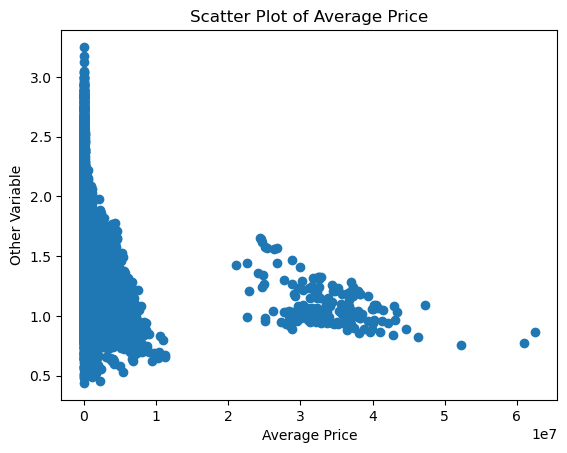

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have a dataset stored in a DataFrame called 'df'
# Make sure 'averageprice' and the other variable are present in the DataFrame

# Create a scatter plot
plt.scatter(df1['Total Volume'], df1['AveragePrice'])

# Add labels and title
plt.xlabel('Average Price')
plt.ylabel('Other Variable')
plt.title('Scatter Plot of Average Price')

# Display the plot
plt.show()


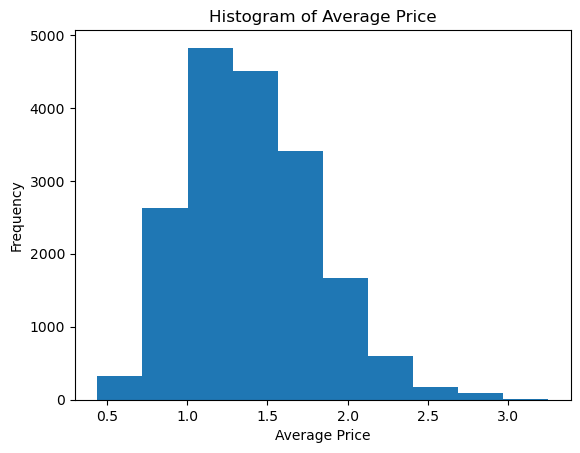

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have a DataFrame called 'df' with the 'averageprice' column

# Create a histogram
plt.hist(df1['AveragePrice'], bins=10)

# Add labels and title
plt.xlabel('Average Price')
plt.ylabel('Frequency')
plt.title('Histogram of Average Price')

# Display the plot
plt.show()


In [649]:
import pandas as pd

# Assuming you have a DataFrame called 'df' with the 'averageprice' column

# Calculate the interquartile range
Q1 = df1['AveragePrice'].quantile(0.25)
Q3 = df1['AveragePrice'].quantile(0.75)
IQR = Q3 - Q1

# Print the interquartile range
print("Interquartile Range (IQR):", IQR)


Interquartile Range (IQR): 0.5599999999999998


In [650]:
#K-fold cross-validation 
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import Ridge
model = Ridge(alpha=1.0)
features = [ '4046','4770','4225', 'Total Bags','Seasons','region', 'Month', 'Year', 'type']
target = 'AveragePrice'
X = df1[features]
Y = df1[target]
k = 5
cv = KFold(n_splits=k, shuffle=True, random_state=42)
scores = cross_val_score(model, X, Y, scoring='r2', cv=cv)
for i, score in enumerate(scores):
    print(f"Fold {i+1}: R-squared = {score:.4f}")
mean_score = scores.mean()
std_score = scores.std()
print(f"\nMean R-squared: {mean_score:.4f}")
print(f"Standard Deviation: {std_score:.4f}")


Fold 1: R-squared = 0.4545
Fold 2: R-squared = 0.4625
Fold 3: R-squared = 0.4828
Fold 4: R-squared = 0.4606
Fold 5: R-squared = 0.4520

Mean R-squared: 0.4625
Standard Deviation: 0.0109


In [651]:
#Lasso Regression
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming you have X as the feature matrix and y as the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a Lasso regression model
lasso = Lasso(alpha=1.0)

# Fit the model to the training data
lasso.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred = lasso.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 0.16070035526786625
R-squared: -0.00019463576641443048


In [652]:
#Ridge Regression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming you have X as the feature matrix and y as the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a Ridge regression model
ridge = Ridge(alpha=1.0)

# Fit the model to the training data
ridge.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred = ridge.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 0.08764374346917907
R-squared: 0.454507726941601


In [653]:
LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming you have X as the feature matrix and y as the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a Linear Regression model
lr = LinearRegression()

# Fit the model to the training data
lr.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred = lr.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 0.0876437934696801
R-squared: 0.454507415739844


In [654]:
#AdaBoostRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming you have X as the feature matrix and y as the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create an AdaBoost Regressor model
adaboost = AdaBoostRegressor()

# Fit the model to the training data
adaboost.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred = adaboost.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 0.0710554250331152
R-squared: 0.5577529692341914


In [655]:
#StackingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming you have X as the feature matrix and y as the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create individual base models
model1 = LinearRegression()
model2 = DecisionTreeRegressor()

# Create a Stacking Regressor model
stacking_reg = StackingRegressor(estimators=[('lr', model1), ('dt', model2)])

# Fit the model to the training data
stacking_reg.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred = stacking_reg.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 0.0321419975988037
R-squared: 0.7999490820816573


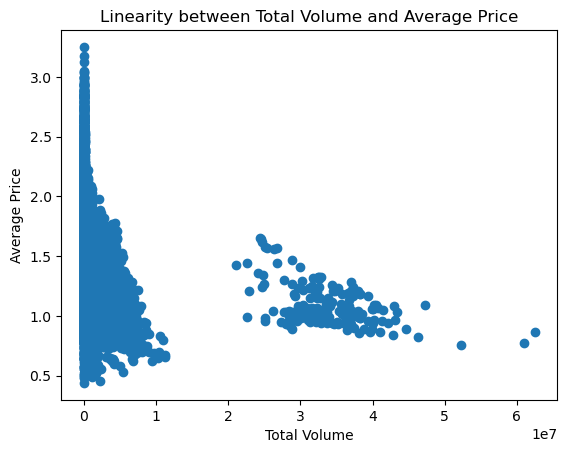

In [629]:
plt.scatter(df1['Total Volume'],df1['AveragePrice'])
plt.xlabel('Total Volume')
plt.ylabel('Average Price')
plt.title('Linearity between Total Volume and Average Price')
plt.show()